# 01 — Quickstart (mcport)

Demo práctica de PriceSeries/Portfolio/MonteCarlo/Plots/Report.

El objetivo de este notebook es **analizar las series históricas de precios** y realizar una **simulación Monte Carlo** sobre una **cartera temática diversificada naive**.  
Esta cartera combina **tecnología, energía e industria** para equilibrar crecimiento, estabilidad y cobertura ante ciclos económicos.

> 📈 *El histórico de precios se extraerá desde Yahoo Finance, cubriendo los últimos **3 años** de cotización, y se empleará para estimar la evolución esperada durante los próximos **6 meses** (estrategia semestral) mediante simulación Monte Carlo.*

---

Se han elegido **seis empresas estadounidenses** líderes en sus respectivos sectores, todas cotizadas en **USD**, para simplificar el análisis y evitar efectos por tipo de cambio.

| 🏷️ Sector | 🏢 Empresa | 💹 Ticker | 🧭 Descripción |
|:-----------|:------------|:-----------|:----------------|
| 🧠 **Tecnología** | Apple Inc. | `AAPL` | Ecosistema iOS/macOS y hardware premium |
| 🧠 **Tecnología** | NVIDIA Corp. | `NVDA` | GPUs, IA y semiconductores de alto rendimiento |
| ⚡ **Energía** | Exxon Mobil Corp. | `XOM` | Energía fósil, exploración y refino |
| ⚡ **Energía** | NextEra Energy Inc. | `NEE` | Energías renovables y utilities eléctricas |
| 🏗️ **Industria / Defensa** | Lockheed Martin Corp. | `LMT` | Fabricante aeroespacial y de defensa |
| 🚜 **Industria / Construcción** | Caterpillar Inc. | `CAT` | Maquinaria pesada y equipamiento industrial |



## 1. Extracción de datos

In [ ]:
#Importación de librerías

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(context="notebook", style="whitegrid")
from mcport import PriceSeries, Portfolio, MonteCarloSimulation

Usaremos el extractor de yfinance para obtener los datos crudos.

In [ ]:
from mcport.providers import YahooProvider

# --- Tickers de la cartera diversificada (USD) ---
symbols = ["AAPL", "NVDA", "XOM", "NEE", "LMT", "CAT"]

# Instancia del proveedor Yahoo
provider = YahooProvider()

# 3 años (~756 días hábiles)
dict_pricehistory = provider.price_history(symbols=symbols, periods=756)

# Vista previa de los precios descargados
for sym, df in dict_pricehistory.items():
    print(f"\n📈 {sym} ({len(df)} registros)")
    display(df.head())



📈 AAPL (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,155.080002,155.449997,149.130005,150.649994,148.308899,80379300
2022-11-02,148.949997,152.169998,145.000000,145.029999,142.776184,93604600
2022-11-03,142.059998,142.800003,138.750000,138.880005,136.721786,97918500
2022-11-04,142.089996,142.669998,134.380005,138.380005,136.455536,140814800
2022-11-07,137.110001,139.149994,135.669998,138.919998,136.988022,83374600



📈 NVDA (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,13.811,13.925,13.519,13.543,13.526749,432817000
2022-11-02,13.850,14.210,13.211,13.219,13.203135,672628000
2022-11-03,13.043,13.781,12.956,13.421,13.404894,500065000
2022-11-04,13.986,14.229,13.697,14.156,14.139013,612576000
2022-11-07,14.228,14.412,13.954,14.301,14.283838,410061000



📈 XOM (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,112.370003,112.570000,110.650002,111.910004,101.010757,22213100
2022-11-02,111.580002,112.099998,109.309998,109.610001,98.934761,20654200
2022-11-03,108.580002,111.820000,108.309998,111.099998,100.279633,17103700
2022-11-04,113.000000,113.500000,110.800003,112.309998,101.371788,17541500
2022-11-07,112.410004,113.989998,112.129997,113.639999,102.572258,16008000



📈 NEE (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,78.190002,78.190002,77.169998,77.709999,71.336082,5410300
2022-11-02,77.699997,79.830002,77.019997,77.279999,70.941338,7119000
2022-11-03,76.739998,79.180000,76.360001,78.180000,71.767517,6920300
2022-11-04,78.599998,79.180000,77.419998,78.800003,72.336655,7758900
2022-11-07,78.730003,79.120003,76.290001,77.290001,70.950508,7008500



📈 LMT (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,486.029999,491.160004,483.869995,485.630005,448.158508,1229700
2022-11-02,484.540009,488.880005,481.500000,482.059998,444.863953,1291800
2022-11-03,479.769989,489.970001,478.549988,484.820007,447.411072,1291100
2022-11-04,485.160004,486.500000,472.570007,481.670013,444.504120,1481100
2022-11-07,482.480011,489.959991,480.959991,488.630005,450.927063,944800



📈 CAT (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-11-01,218.630005,219.470001,216.710007,218.500000,207.601685,2717500
2022-11-02,217.600006,221.699997,213.929993,214.539993,203.839203,3150000
2022-11-03,211.539993,221.789993,211.360001,219.259995,208.323746,3570400
2022-11-04,224.020004,229.729996,223.600006,227.850006,216.485336,4973800
2022-11-07,228.000000,229.130005,222.669998,228.610001,217.207428,3405600


## 2. Convertimos los activos a una PriceSeries y los agrupamos en un Portfolio

Convertir a PriceSeries el DataFrame permite unificar formatos y aplica funciones internas de limpieza.

In [8]:
#Creamos el diccionario de PriceSeries
price_series_dict = {}

for sym, df in dict_pricehistory.items():
    ps = PriceSeries.from_dataframe(
        symbol=sym,
        df=df,
        price_col="adj_close",
        currency="USD",
        provider="YahooFinance",
        asset_type="equity"
    )
    price_series_dict[sym] = ps

    
#Resumen rápido de estadísticas de las PriceSeries

for sym, ps in price_series_dict.items():
    s = ps.extra_stats()
    print(f"""
──────────────────────────────
📈 {sym}  ({len(ps.data)} registros)
μ diario:  {ps.mu:>8.6f}     σ diario: {ps.sigma:>8.6f}
μ anual:   {s['mu_ann']:>8.3f}     σ anual: {s['sigma_ann']:>8.3f}
Sharpe:    {s['sharpe_daily']:>8.3f}     Skew: {s['skew']:>8.3f}
Kurtosis:  {s['kurtosis']:>8.3f}
VaR95:     {s['var_95']:>8.3f}     CVaR95: {s['cvar_95']:>8.3f}
──────────────────────────────
""")



──────────────────────────────
📈 AAPL  (788 registros)
μ diario:  0.000760     σ diario: 0.016590
μ anual:      0.192     σ anual:    0.263
Sharpe:       0.046     Skew:    0.549
Kurtosis:    10.120
VaR95:       -0.026     CVaR95:   -0.038
──────────────────────────────


──────────────────────────────
📈 NVDA  (788 registros)
μ diario:  0.003345     σ diario: 0.031528
μ anual:      0.843     σ anual:    0.500
Sharpe:       0.106     Skew:    0.443
Kurtosis:     6.367
VaR95:       -0.044     CVaR95:   -0.066
──────────────────────────────


──────────────────────────────
📈 XOM  (788 registros)
μ diario:  0.000159     σ diario: 0.014262
μ anual:      0.040     σ anual:    0.226
Sharpe:       0.011     Skew:   -0.361
Kurtosis:     1.935
VaR95:       -0.023     CVaR95:   -0.033
──────────────────────────────


──────────────────────────────
📈 NEE  (788 registros)
μ diario:  0.000177     σ diario: 0.017038
μ anual:      0.045     σ anual:    0.270
Sharpe:       0.010     Skew:   -0.749
Kur

Creación de la cartera. Asignaremos pesos a los assets del 40% para el sector tecnológico, 15% para energía y 15% para industria y defensa.

Serie generada con 787 puntos


2022-11-02    1.000000
2022-11-03    1.002252
2022-11-04    1.020324
2022-11-07    1.024754
2022-11-08    1.034871
Freq: B, Name: Cartera_Diversificada, dtype: float64

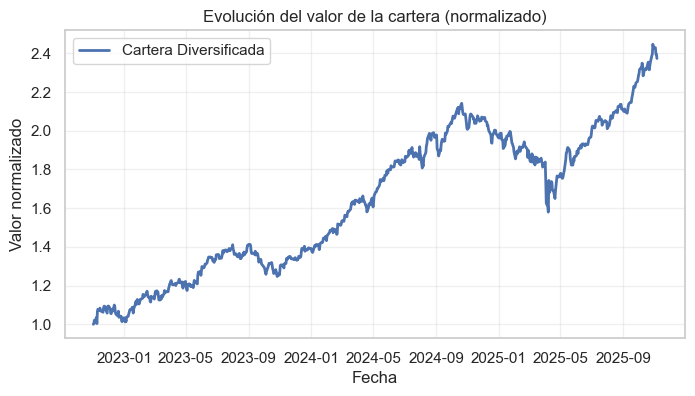

In [5]:
# --- Seleccionamos los PriceSeries del diccionario ---
positions = [
    price_series_dict["AAPL"],
    price_series_dict["NVDA"],
    price_series_dict["XOM"],
    price_series_dict["NEE"],
    price_series_dict["LMT"],
    price_series_dict["CAT"],
]

# --- Pesos según bloques temáticos ---
weights = [0.20, 0.20, 0.15, 0.15, 0.15, 0.15]

# --- Creamos la cartera ---
portfolio = Portfolio(
    positions=positions,
    weights=weights,
    name="Cartera_Diversificada",
    currency="USD"
)

# --- Verificamos que la cartera esté bien creada ---

# Serie de valor normalizada (1 = inicio)
eq_curve = portfolio.value_series(initial_capital=1.0)

print(f"Serie generada con {len(eq_curve)} puntos")
display(eq_curve.head())

# Visual rápida
plt.figure(figsize=(8,4))
plt.plot(eq_curve, label="Cartera Diversificada", linewidth=2)
plt.title("Evolución del valor de la cartera (normalizado)")
plt.xlabel("Fecha")
plt.ylabel("Valor normalizado")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [6]:
# ============================================================
# 📊 ANÁLISIS DE ESTADÍSTICAS DEL PORTFOLIO
# ============================================================

print("═" * 70)
print("🔹 ESTADÍSTICAS BÁSICAS DEL PORTFOLIO")
print("═" * 70)
print(f"μ diario:  {portfolio.mu_daily:.6f}")
print(f"σ diario:  {portfolio.sigma_daily:.6f}")
print(f"μ anual:   {portfolio.mu_ann:.4f}")
print(f"σ anual:   {portfolio.sigma_ann:.4f}")

print("\n📈 Matriz de correlaciones entre activos:")
print(portfolio.corr.round(3))
print("═" * 70)

# ============================================================
# 📈 ESTADÍSTICAS EXTENDIDAS (EXTRA STATS)
# ============================================================
extra = portfolio.extra_stats_from_portfolio(rf_daily=0.0)

print("\n🔹 ESTADÍSTICAS AVANZADAS (basadas en retornos diarios)")
print("═" * 70)
print(f"• Asimetría (skew):           {extra['skew']:.3f}")
print(f"• Curtosis (exceso):          {extra['kurtosis']:.3f}")
print(f"• Sharpe ratio diario:        {extra['sharpe_daily']:.3f}")
print(f"• Sharpe ratio anualizado:    {extra['sharpe_annual']:.3f}")
print(f"• Sortino ratio anualizado:   {extra['sortino_annual']:.3f}")
print(f"• VaR 95% diario:             {extra['VaR95']*100:.2f}%")
print(f"• CVaR 95% diario:            {extra['CVaR95']*100:.2f}%")
print(f"• Máx. drawdown:              {extra['max_drawdown']*100:.2f}%")
print("═" * 70)

# ============================================================
# ⚙️ ACTUALIZAR PESOS Y RE-CALCULAR ESTADÍSTICAS
# ============================================================
portfolio.weights = [0.25, 0.15, 0.20, 0.20, 0.10, 0.10]
portfolio.refresh_stats()

print("\n🔄 Pesos modificados → estadísticas recalculadas")
print("═" * 70)
print(f"μ anualizado (actualizado): {portfolio.mu_ann:.4f}")
print(f"σ anualizado (actualizado): {portfolio.sigma_ann:.4f}")
print("═" * 70)


══════════════════════════════════════════════════════════════════════
🔹 ESTADÍSTICAS BÁSICAS DEL PORTFOLIO
══════════════════════════════════════════════════════════════════════
μ diario:  0.001100
σ diario:  0.011261
μ anual:   0.2771
σ anual:   0.1788

📈 Matriz de correlaciones entre activos:
       AAPL   NVDA    XOM    NEE    LMT    CAT
AAPL  1.000  0.416  0.228  0.172  0.059  0.342
NVDA  0.416  1.000  0.051  0.009 -0.070  0.323
XOM   0.228  0.051  1.000  0.202  0.250  0.403
NEE   0.172  0.009  0.202  1.000  0.187  0.123
LMT   0.059 -0.070  0.250  0.187  1.000  0.098
CAT   0.342  0.323  0.403  0.123  0.098  1.000
══════════════════════════════════════════════════════════════════════

🔹 ESTADÍSTICAS AVANZADAS (basadas en retornos diarios)
══════════════════════════════════════════════════════════════════════
• Asimetría (skew):           0.450
• Curtosis (exceso):          10.461
• Sharpe ratio diario:        0.098
• Sharpe ratio anualizado:    1.550
• Sortino ratio anualizado:   2

## 3. Aplicamos método Monte Carlo para predecir los siguientes 6 meses
Veremos cómo aplicarlo a cada uno de los activos y a la cartera en su totalidad.

In [7]:
results_assets = {}
n_days = 126       # 6 meses ~ 126 días hábiles
n_sims = 2000
seed = 42

# ----------------------------
# 1️⃣ Monte Carlo por activo
# ----------------------------
print("═" * 80)
print(f"🎯 SIMULACIÓN MONTE CARLO POR ACTIVO ({n_days} días, {n_sims} simulaciones)")
print("═" * 80)

for sym, ps in price_series_dict.items():
    mc = MonteCarloSimulation(ps, days=n_days, n_sims=n_sims, seed=seed)
    res = mc.simulate_and_summarize()
    results_assets[sym] = res

    s = res["summary"]
    print(f"\n📊 {sym}")
    print(f"   • Valor final medio:      ${s['mean_final_value']:,.2f}")
    print(f"   • Retorno medio:          {s['mean_return']*100:.2f}%")
    print(f"   • Volatilidad anualizada: {s['sigma_annualized']*100:.2f}%")
    print(f"   • VaR 95%:                {s['VaR_95']*100:.2f}%")
    print(f"   • CVaR 95%:               {s['CVaR_95']*100:.2f}%")
    print("-" * 80)

# ----------------------------
# 2️⃣ Monte Carlo del Portfolio
# ----------------------------
print("\n" + "═" * 80)
print(f"💼 SIMULACIÓN MONTE CARLO DE LA CARTERA ({n_days} días, {n_sims} simulaciones)")
print("═" * 80)

mc_port = MonteCarloSimulation(
    portfolio, days=n_days, n_sims=n_sims, capital_inicial=1000.0, seed=seed
)
res_port = mc_port.simulate_and_summarize()
s = res_port["summary"]

print(f"\n📈 CARTERA GLOBAL")
print(f"   • Capital inicial:        ${s['capital_inicial']:,.2f}")
print(f"   • Valor final medio:      ${s['mean_final_value']:,.2f}")
print(f"   • Retorno medio:          {s['mean_return']*100:.2f}%")
print(f"   • Desviación final:       ${s['std_final_value']:,.2f}")
print(f"   • Volatilidad anualizada: {s['sigma_annualized']*100:.2f}%")
print(f"   • VaR 95%:                {s['VaR_95']*100:.2f}%")
print(f"   • CVaR 95%:               {s['CVaR_95']*100:.2f}%")
print(f"   • Retorno esperado anual: {s['mu_annualized']*100:.2f}%")
print("═" * 80)


════════════════════════════════════════════════════════════════════════════════
🎯 SIMULACIÓN MONTE CARLO POR ACTIVO (126 días, 2000 simulaciones)
════════════════════════════════════════════════════════════════════════════════

📊 AAPL
   • Valor final medio:      $297.19
   • Retorno medio:          10.16%
   • Volatilidad anualizada: 26.34%
   • VaR 95%:                -21.27%
   • CVaR 95%:               -26.69%
--------------------------------------------------------------------------------

📊 NVDA
   • Valor final medio:      $287.74
   • Retorno medio:          52.99%
   • Volatilidad anualizada: 50.05%
   • VaR 95%:                -21.72%
   • CVaR 95%:               -31.44%
--------------------------------------------------------------------------------

📊 XOM
   • Valor final medio:      $116.91
   • Retorno medio:          2.10%
   • Volatilidad anualizada: 22.64%
   • VaR 95%:                -23.34%
   • CVaR 95%:               -27.91%
---------------------------------------